In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [224]:
import pandas as pd
import numpy as np

In [271]:
path_train = '/content/drive/My Drive/Colab Notebooks/Competition/HousePrices/train.csv'
train_data = pd.read_csv(path_train)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [272]:
path_test = '/content/drive/My Drive/Colab Notebooks/Competition/HousePrices/test.csv'
test_data = pd.read_csv(path_test)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA

In [273]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_all_distributions(df):
    # --- Plot numeric columns ---
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num = len(numeric_cols)
    cols = 3
    rows = math.ceil(num / cols)
    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'{col}', fontsize=10)
        plt.xlabel('')
        plt.ylabel('')
    plt.suptitle('Numeric Feature Distributions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # --- Plot categorical columns ---
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    num = len(categorical_cols)
    cols = 3
    rows = math.ceil(num / cols)
    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols, i)
        sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
        plt.title(f'{col}', fontsize=10)
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=45)
    plt.suptitle('Categorical Feature Distributions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


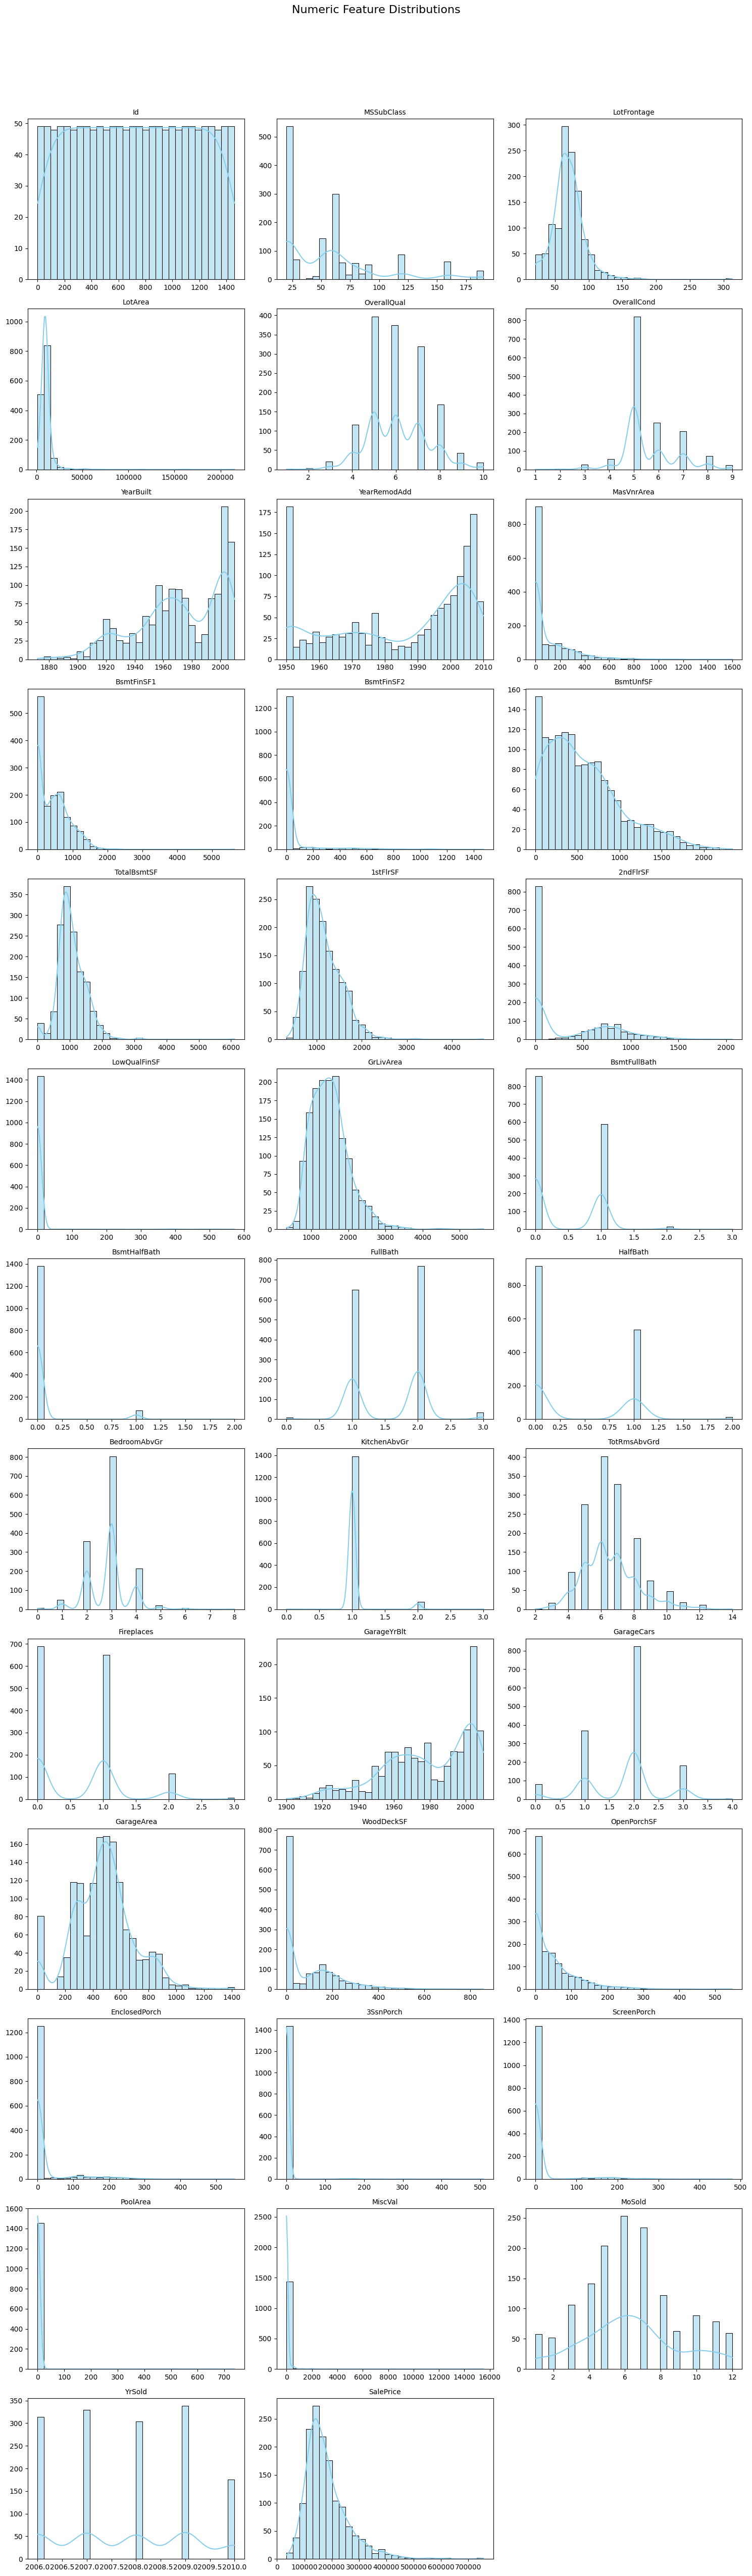

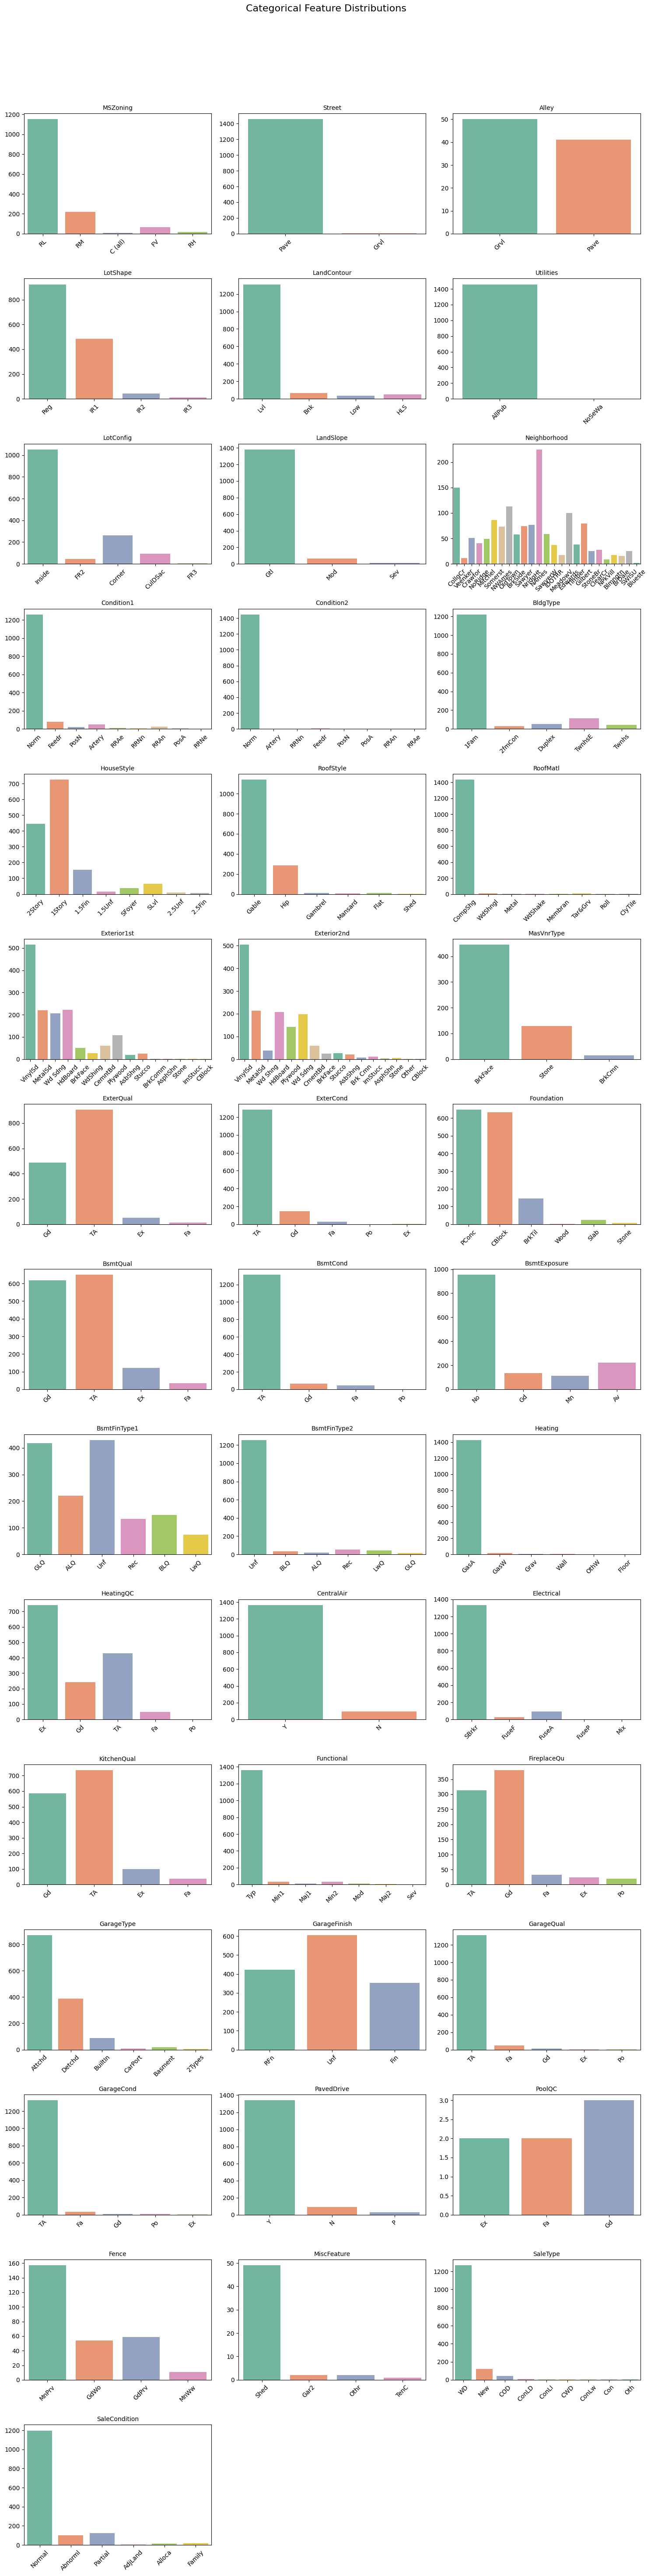

In [275]:
plot_all_distributions(train_data)

# Data Split

In [276]:
from sklearn.model_selection import train_test_split

# Define features and target
X = train_data.drop('SalePrice', axis=1)  # replace 'target_column' with your actual target name
y = train_data['SalePrice']

# Split into train and validation sets (e.g., 80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Data Cleaning

In [277]:
def remove_cols(data):
    data.drop(columns=['Alley', 'PoolQC','Fence', 'MiscFeature'], axis=1, inplace=True)

remove_cols(X_train)
remove_cols(X_valid)

In [278]:
for col in X_train.columns:
    if X_train[col].isna().sum()>0:
        print(f'{col} : {X_train[col].isna().sum()} Nan Values')

LotFrontage : 217 Nan Values
MasVnrType : 683 Nan Values
MasVnrArea : 6 Nan Values
BsmtQual : 28 Nan Values
BsmtCond : 28 Nan Values
BsmtExposure : 28 Nan Values
BsmtFinType1 : 28 Nan Values
BsmtFinType2 : 28 Nan Values
Electrical : 1 Nan Values
FireplaceQu : 547 Nan Values
GarageType : 64 Nan Values
GarageYrBlt : 64 Nan Values
GarageFinish : 64 Nan Values
GarageQual : 64 Nan Values
GarageCond : 64 Nan Values


In [279]:
def fill_missing_values(df):
    """
    Fill missing values in a DataFrame:
    - Categorical columns: filled with mode
    - Numerical columns: filled with median
    Returns the modified DataFrame.
    """
    df = df.copy()  # Avoid modifying the original DataFrame

    # Fill categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)

    # Fill numerical columns with median
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)

    return df


In [280]:
X_train = fill_missing_values(X_train)
X_valid = fill_missing_values(X_valid)


<ipython-input-279-ebd3bca175ae>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-279-ebd3bca175ae>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [281]:
X_train.drop('Id', axis=1, inplace=True)
X_valid.drop('Id', axis=1, inplace=True)

#Feature Engineering

In [282]:
X_train['MSZoning']=X_train['MSZoning'].apply(lambda x: 1 if x=='RL' else 0)
X_train['Street']=X_train['Street'].apply(lambda x: 1 if x=='Pave' else 0)
X_train['LotShape'] = X_train['LotShape'].apply(lambda x: 1 if x == 'Reg' else 0)
X_train['LandContour']=X_train['LandContour'].apply(lambda x: 1 if x=='Lvl' else 0)
X_train.drop('Utilities', axis=1, inplace=True)
X_train['LotConfig']=X_train['LotConfig'].apply(lambda x: 1 if x=='Inside' else 0)
X_train['LandSlope']=X_train['LandSlope'].apply(lambda x: 1 if x=='Gtl' else 0)
X_train['Condition1']=X_train['Condition1'].apply(lambda x: 1 if x=='Norm' else 0)
X_train.drop('Condition2', axis=1, inplace=True)
X_train['BldgType']=X_train['BldgType'].apply(lambda x: 1 if x=='1Fam' else 0)
X_train['HouseStyle'] = X_train['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story', '1.5Fin'] else 'Other')
X_train['RoofStyle']=X_train['RoofStyle'].apply(lambda x: 1 if x=='Gable' else 0)
X_train.drop('RoofMatl', axis=1, inplace=True)
X_train['Exterior1st']=X_train['Exterior1st'].apply(lambda x: x if x=='VinylSd' or x=='HdBoard' or x=='MetalSd' or x=='Wd Sdng' else 'Other')
X_train['Exterior2nd']=X_train['Exterior2nd'].apply(lambda x: x if x in ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'Plywood'] else 'Other')
X_train['MasVnrType']=X_train['MasVnrType'].apply(lambda x: 1 if x=='BrkFace' else 0)
X_train['ExterQual']=X_train['ExterQual'].apply(lambda x: 1 if x=='TA' else 0)
X_train['ExterCond']=X_train['ExterCond'].apply(lambda x: 1 if x=='TA' else 0)
X_train['Foundation']=X_train['Foundation'].apply(lambda x: x if x in ['PConc', 'CBlock', 'BrkTil'] else 'Other')
X_train['BsmtQual']=X_train['BsmtQual'].apply(lambda x: x if x in ['TA', 'Gd'] else 'Other')
X_train['BsmtCond']=X_train['BsmtCond'].apply(lambda x: 1 if x=='TA' else 0)
X_train['BsmtExposure']=X_train['BsmtExposure'].apply(lambda x: 1 if x=='No' else 0)
X_train['BsmtFinType2']=X_train['BsmtFinType2'].apply(lambda x: 1 if x=='Unf' else 0)
X_train.drop('Heating', axis=1, inplace=True)
X_train['HeatingQC']=X_train['HeatingQC'].apply(lambda x:x if x in ['Ex', 'TA', 'Gd'] else 'Other')
X_train['CentralAir']=X_train['CentralAir'].apply(lambda x: 1 if x=='Y' else 0)
X_train['Electrical']=X_train['Electrical'].apply(lambda x: 1 if x=='SBrkr' else 0)
X_train['Functional']=X_train['Functional'].apply(lambda x: 1 if x=='Typ' else 0)
X_train['FireplaceQu']=X_train['FireplaceQu'].apply(lambda x: x if x in ['Gd', 'TA'] else 'Other')
X_train['GarageType']=X_train['GarageType'].apply(lambda x: x if x in ['Attchd', 'Detchd'] else 'Other')
X_train['GarageQual']=X_train['GarageQual'].apply(lambda x: 1 if x=='TA' else 0)
X_train['GarageCond']=X_train['GarageCond'].apply(lambda x: 1 if x=='TA' else 0)
X_train['PavedDrive']=X_train['PavedDrive'].apply(lambda x: 1 if x=='Y' else 0)
X_train['SaleType']=X_train['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
X_train['SaleCondition']=X_train['SaleCondition'].apply(lambda x: 1 if x=='Normal' else 0)



X_valid['MSZoning'] = X_valid['MSZoning'].apply(lambda x: 1 if x == 'RL' else 0)
X_valid['Street'] = X_valid['Street'].apply(lambda x: 1 if x == 'Pave' else 0)
X_valid['LotShape'] = X_valid['LotShape'].apply(lambda x: 1 if x == 'Reg' else 0)
X_valid['LandContour'] = X_valid['LandContour'].apply(lambda x: 1 if x == 'Lvl' else 0)
X_valid.drop('Utilities', axis=1, inplace=True)
X_valid['LotConfig'] = X_valid['LotConfig'].apply(lambda x: 1 if x == 'Inside' else 0)
X_valid['LandSlope'] = X_valid['LandSlope'].apply(lambda x: 1 if x == 'Gtl' else 0)
X_valid['Condition1'] = X_valid['Condition1'].apply(lambda x: 1 if x == 'Norm' else 0)
X_valid.drop('Condition2', axis=1, inplace=True)
X_valid['BldgType'] = X_valid['BldgType'].apply(lambda x: 1 if x == '1Fam' else 0)
X_valid['HouseStyle'] = X_valid['HouseStyle'].apply(lambda x: x if x in ['1Story', '2Story', '1.5Fin'] else 'Other')
X_valid['RoofStyle'] = X_valid['RoofStyle'].apply(lambda x: 1 if x == 'Gable' else 0)
X_valid.drop('RoofMatl', axis=1, inplace=True)
X_valid['Exterior1st'] = X_valid['Exterior1st'].apply(lambda x: x if x in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng'] else 'Other')
X_valid['Exterior2nd'] = X_valid['Exterior2nd'].apply(lambda x: x if x in ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'Plywood'] else 'Other')
X_valid['MasVnrType'] = X_valid['MasVnrType'].apply(lambda x: 1 if x == 'BrkFace' else 0)
X_valid['ExterQual'] = X_valid['ExterQual'].apply(lambda x: 1 if x == 'TA' else 0)
X_valid['ExterCond'] = X_valid['ExterCond'].apply(lambda x: 1 if x == 'TA' else 0)
X_valid['Foundation'] = X_valid['Foundation'].apply(lambda x: x if x in ['PConc', 'CBlock', 'BrkTil'] else 'Other')
X_valid['BsmtQual'] = X_valid['BsmtQual'].apply(lambda x: x if x in ['TA', 'Gd'] else 'Other')
X_valid['BsmtCond'] = X_valid['BsmtCond'].apply(lambda x: 1 if x == 'TA' else 0)
X_valid['BsmtExposure'] = X_valid['BsmtExposure'].apply(lambda x: 1 if x == 'No' else 0)
X_valid['BsmtFinType2'] = X_valid['BsmtFinType2'].apply(lambda x: 1 if x == 'Unf' else 0)
X_valid.drop('Heating', axis=1, inplace=True)
X_valid['HeatingQC'] = X_valid['HeatingQC'].apply(lambda x: x if x in ['Ex', 'TA', 'Gd'] else 'Other')
X_valid['CentralAir'] = X_valid['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
X_valid['Electrical'] = X_valid['Electrical'].apply(lambda x: 1 if x == 'SBrkr' else 0)
X_valid['Functional'] = X_valid['Functional'].apply(lambda x: 1 if x == 'Typ' else 0)
X_valid['FireplaceQu'] = X_valid['FireplaceQu'].apply(lambda x: x if x in ['Gd', 'TA'] else 'Other')
X_valid['GarageType'] = X_valid['GarageType'].apply(lambda x: x if x in ['Attchd', 'Detchd'] else 'Other')
X_valid['GarageQual'] = X_valid['GarageQual'].apply(lambda x: 1 if x == 'TA' else 0)
X_valid['GarageCond'] = X_valid['GarageCond'].apply(lambda x: 1 if x == 'TA' else 0)
X_valid['PavedDrive'] = X_valid['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
X_valid['SaleType'] = X_valid['SaleType'].apply(lambda x: 1 if x == 'WD' else 0)
X_valid['SaleCondition'] = X_valid['SaleCondition'].apply(lambda x: 1 if x == 'Normal' else 0)


In [283]:
!pip install category_encoders


In [284]:
# Install first if not done:
# pip install category_encoders

import category_encoders as ce

# Columns to encode
high_card_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

# Initialize encoder
binary_encoder = ce.BinaryEncoder(cols=high_card_cols)

# Apply to X_train
X_train = binary_encoder.fit_transform(X_train)


In [285]:
X_valid = binary_encoder.transform(X_valid)


In [286]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1168 non-null   int64  
 1   MSZoning        1168 non-null   int64  
 2   LotFrontage     1168 non-null   float64
 3   LotArea         1168 non-null   int64  
 4   Street          1168 non-null   int64  
 5   LotShape        1168 non-null   int64  
 6   LandContour     1168 non-null   int64  
 7   LotConfig       1168 non-null   int64  
 8   LandSlope       1168 non-null   int64  
 9   Neighborhood_0  1168 non-null   int64  
 10  Neighborhood_1  1168 non-null   int64  
 11  Neighborhood_2  1168 non-null   int64  
 12  Neighborhood_3  1168 non-null   int64  
 13  Neighborhood_4  1168 non-null   int64  
 14  Condition1      1168 non-null   int64  
 15  BldgType        1168 non-null   int64  
 16  HouseStyle      1168 non-null   object 
 17  OverallQual     1168 non-null   int6

In [287]:
from sklearn.preprocessing import OneHotEncoder

# Select object-type columns
object_cols = ['GarageFinish','HouseStyle', 'Foundation', 'BsmtQual','BsmtFinType1', 'HeatingQC', 'KitchenQual',
               'FireplaceQu','GarageType', 'GarageFinish']

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform for X_train
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[object_cols]),
                           columns=ohe.get_feature_names_out(object_cols),
                           index=X_train.index)

# Transform for X_valid
X_valid_ohe = pd.DataFrame(ohe.transform(X_valid[object_cols]),
                           columns=ohe.get_feature_names_out(object_cols),
                           index=X_valid.index)

# Combine with numerical columns
X_train = pd.concat([X_train.drop(columns=object_cols), X_train_ohe], axis=1)
X_valid = pd.concat([X_valid.drop(columns=object_cols), X_valid_ohe], axis=1)

# Now you can use X_train.info() and see the columns with null information



In [288]:
print(X_train.isnull().sum().sum())
print(X_valid.isnull().sum().sum())

0
0


In [289]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Columns: 107 entries, MSSubClass to GarageFinish_Unf
dtypes: float64(40), int64(67)
memory usage: 985.5 KB


In [290]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Columns: 107 entries, MSSubClass to GarageFinish_Unf
dtypes: float64(40), int64(67)
memory usage: 246.4 KB


# Log Transformation & Scaling

In [291]:
X_train.drop('LowQualFinSF', axis=1, inplace=True)
X_valid.drop('LowQualFinSF', axis=1, inplace=True)

In [292]:
X_train.drop('3SsnPorch', axis=1, inplace=True)
X_valid.drop('3SsnPorch', axis=1, inplace=True)

In [293]:
X_train.drop('PoolArea', axis=1, inplace=True)
X_valid.drop('PoolArea', axis=1, inplace=True)

In [294]:
X_train.drop('MiscVal', axis=1, inplace=True)
X_valid.drop('MiscVal', axis=1, inplace=True)

In [295]:
log_list=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
          'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF',
          '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
          'OpenPorchSF','ScreenPorch']

scaler_list=log_list+['YrSold','MoSold','GarageCars']

In [296]:
from sklearn.preprocessing import StandardScaler

for col in log_list:
    if col in X_train.columns:
        X_train[col] = np.log1p(X_train[col])
        X_valid[col] = np.log1p(X_valid[col])

# Apply standard scaling
scaler = StandardScaler()
X_train[scaler_list] = scaler.fit_transform(X_train[scaler_list])
X_valid[scaler_list] = scaler.transform(X_valid[scaler_list])

# Feature Selecting

In [297]:
# Example: filter low-correlation features
correlations = X_train.corrwith(y_train).abs()
low_corr_features = correlations[correlations < 0.07].index
X_train = X_train.drop(columns=low_corr_features)
X_valid = X_valid.drop(columns=low_corr_features)


In [298]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1168 non-null   int64  
 1   MSZoning           1168 non-null   int64  
 2   LotFrontage        1168 non-null   float64
 3   LotArea            1168 non-null   float64
 4   LotShape           1168 non-null   int64  
 5   Neighborhood_0     1168 non-null   int64  
 6   Neighborhood_1     1168 non-null   int64  
 7   Neighborhood_2     1168 non-null   int64  
 8   Neighborhood_4     1168 non-null   int64  
 9   Condition1         1168 non-null   int64  
 10  BldgType           1168 non-null   int64  
 11  OverallQual        1168 non-null   int64  
 12  OverallCond        1168 non-null   int64  
 13  YearBuilt          1168 non-null   float64
 14  YearRemodAdd       1168 non-null   float64
 15  RoofStyle          1168 non-null   int64  
 16  Exterior1st_1      1168 non

In [299]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Set the threshold for high correlation (0.75)
threshold = 0.75

# Get pairs of features with correlation > 0.75
high_corr_pairs = []

# Iterate through the correlation matrix to find correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # Check if the absolute correlation is greater than the threshold
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display the pairs
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# If you want to display the pairs clearly
for pair in high_corr_pairs:
    print(f"Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}")


Features: GarageFinish_Fin and GarageFinish_Fin | Correlation: 1.00
Features: GarageFinish_RFn and GarageFinish_RFn | Correlation: 1.00
Features: GarageFinish_Unf and GarageFinish_Unf | Correlation: 1.00
Features: BsmtFinType1_Unf and BsmtFinSF1 | Correlation: -0.97
Features: FireplaceQu_TA and FireplaceQu_Gd | Correlation: -0.86
Features: KitchenQual_TA and KitchenQual_Gd | Correlation: -0.83
Features: TotRmsAbvGrd and GrLivArea | Correlation: 0.82
Features: BldgType and MSSubClass | Correlation: -0.82
Features: GarageType_Detchd and GarageType_Attchd | Correlation: -0.81
Features: BsmtQual_TA and BsmtQual_Gd | Correlation: -0.80
Features: Foundation_PConc and Foundation_CBlock | Correlation: -0.78
Features: HouseStyle_2Story and 2ndFlrSF | Correlation: 0.78
Features: GarageYrBlt and YearBuilt | Correlation: 0.77


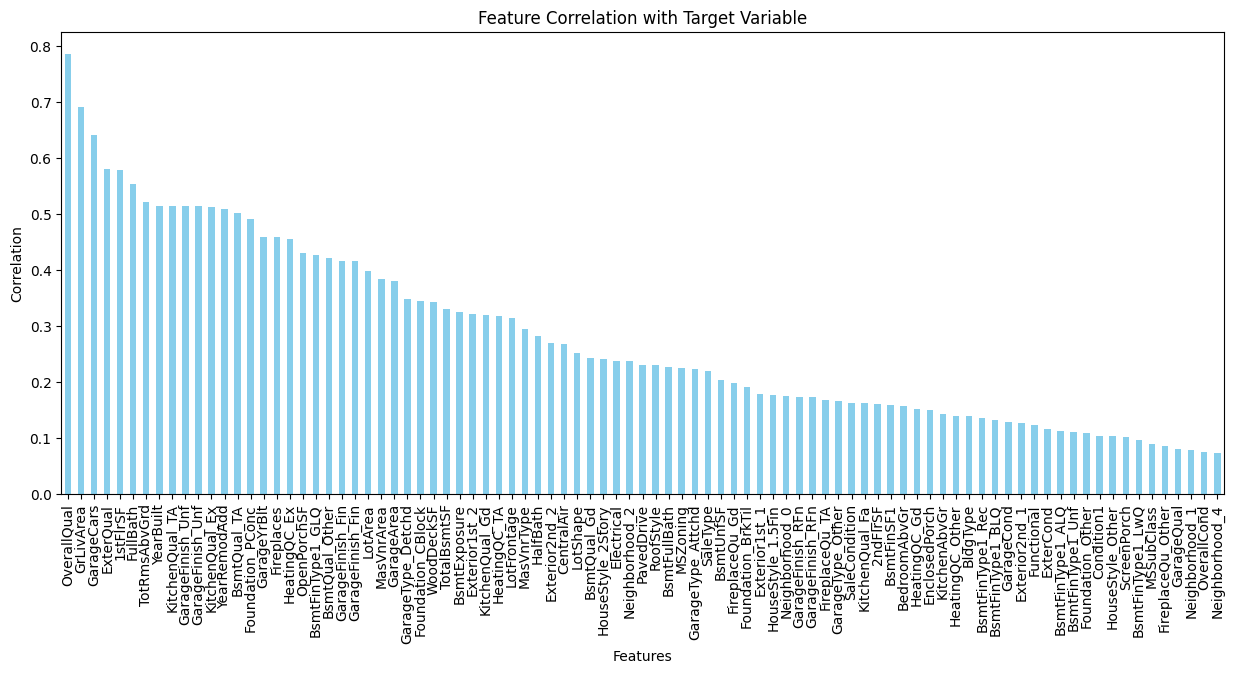

In [300]:
import matplotlib.pyplot as plt

# Calculate correlations between each feature in X_train and target y_train
correlations = X_train.corrwith(y_train).abs()

# Create a vertical bar plot
plt.figure(figsize=(15, 6))
correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


In [301]:
cols_skip=['GarageYrBlt', 'Foundation_CBlock', 'BsmtQual_Gd', 'GarageType_Attchd', 'TotRmsAbvGrd', 'KitchenQual_Gd', '2ndFlrSF',
           'MSSubClass', 'FireplaceQu_TA']

X_train.drop(columns=cols_skip, axis=1, inplace=True)
X_valid.drop(columns=cols_skip, axis=1, inplace=True)

In [302]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSZoning           1168 non-null   int64  
 1   LotFrontage        1168 non-null   float64
 2   LotArea            1168 non-null   float64
 3   LotShape           1168 non-null   int64  
 4   Neighborhood_0     1168 non-null   int64  
 5   Neighborhood_1     1168 non-null   int64  
 6   Neighborhood_2     1168 non-null   int64  
 7   Neighborhood_4     1168 non-null   int64  
 8   Condition1         1168 non-null   int64  
 9   BldgType           1168 non-null   int64  
 10  OverallQual        1168 non-null   int64  
 11  OverallCond        1168 non-null   int64  
 12  YearBuilt          1168 non-null   float64
 13  YearRemodAdd       1168 non-null   float64
 14  RoofStyle          1168 non-null   int64  
 15  Exterior1st_1      1168 non-null   int64  
 16  Exterior1st_2      1168 non

# Baseline Models

In [303]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Train Lasso model (L1 regularization)
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_valid)
y_pred_lasso = np.where(y_pred_lasso < 0, 0, y_pred_lasso)  # Ensure positivity
rmse_lasso = np.sqrt(mean_squared_error(np.log1p(y_valid), np.log1p(y_pred_lasso)))
print(f'Lasso (L1) RMSE: {rmse_lasso:.5f}')

# Train Ridge model (L2 regularization)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_valid)
y_pred_ridge = np.where(y_pred_ridge < 0, 0, y_pred_ridge)  # Ensure positivity
rmse_ridge = np.sqrt(mean_squared_error(np.log1p(y_valid), np.log1p(y_pred_ridge)))
print(f'Ridge (L2) RMSE: {rmse_ridge:.5f}')


Lasso (L1) RMSE: 0.63737
Ridge (L2) RMSE: 0.63733


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.673e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [304]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predict on validation data
y_pred_rf = model_rf.predict(X_valid)

# Apply log transformation to both predictions and actual values
y_valid_log_rf = np.log1p(y_valid)
y_pred_log_rf = np.log1p(y_pred_rf)

# Calculate RMSE for Random Forest Regressor
rmse_rf = np.sqrt(mean_squared_error(y_valid_log_rf, y_pred_log_rf))

# Print RMSE for Random Forest
print(f'Random Forest Model RMSE: {rmse_rf}')


Random Forest Model RMSE: 0.15569299733680575


In [305]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model_gb.fit(X_train, y_train)

# Predict on validation data
y_pred_gb = model_gb.predict(X_valid)

# Apply log transformation to both predictions and actual values
y_valid_log_gb = np.log1p(y_valid)
y_pred_log_gb = np.log1p(y_pred_gb)

# Calculate RMSE for Gradient Boosting Regressor
rmse_gb = np.sqrt(mean_squared_error(y_valid_log_gb, y_pred_log_gb))

# Print RMSE for Gradient Boosting
print(f'Gradient Boosting Model RMSE: {rmse_gb}')


Gradient Boosting Model RMSE: 0.14029351629817458


In [306]:
import xgboost as xgb
import numpy as np

# Convert X_train and y_train to numpy arrays if they are DataFrames
X_train_np = X_train.values
y_train_np = y_train.values

# Initialize the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model_xgb.fit(X_train_np, y_train_np)

# Predict on validation data
X_valid_np = X_valid.values
y_pred_xgb = model_xgb.predict(X_valid_np)

# Apply log transformation to both predictions and actual values
y_valid_log_xgb = np.log1p(y_valid)
y_pred_log_xgb = np.log1p(y_pred_xgb)

# Calculate RMSE for XGBoost Regressor
rmse_xgb = np.sqrt(mean_squared_error(y_valid_log_xgb, y_pred_log_xgb))

# Print RMSE for XGBoost
print(f'XGBoost Model RMSE: {rmse_xgb}')


XGBoost Model RMSE: 0.1515786390243547


# Hyperparameter Tuning

In [307]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Log-transform target
y_train_log = np.log1p(y_train)

# Custom RMSE scorer for log scale
def log_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

log_rmse_scorer = make_scorer(log_rmse, greater_is_better=False)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

model = GradientBoostingRegressor(random_state=42)

search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=30,
    scoring=log_rmse_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on log-transformed target
search.fit(X_train, y_train_log)

# Best parameters and RMSE (on log scale)
print(f'Best params: {search.best_params_}')
print(f'Best log-RMSE: {-search.best_score_:.5f}')

# Optional: Evaluate on validation set (log-RMSE)
y_pred_valid = search.best_estimator_.predict(X_valid)
rmse_valid_log = np.sqrt(mean_squared_error(np.log1p(y_valid), y_pred_valid))
print(f'Validation log-RMSE: {rmse_valid_log:.5f}')


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.05}
Best log-RMSE: 0.12451
Validation log-RMSE: 0.13694


# Submission

In [308]:
remove_cols(test_data)

X_test=test_data.copy()

X_test = fill_missing_values(X_test)
X_test.drop('Id', axis=1, inplace=True)



<ipython-input-279-ebd3bca175ae>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-279-ebd3bca175ae>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [309]:
X_test['MSZoning'] = X_test['MSZoning'].apply(lambda x: 1 if x == 'RL' else 0)
X_test['Street'] = X_test['Street'].apply(lambda x: 1 if x == 'Pave' else 0)
X_test['LotShape'] = X_test['LotShape'].apply(lambda x: 1 if x == 'Reg' else 0)
X_test['LandContour'] = X_test['LandContour'].apply(lambda x: 1 if x == 'Lvl' else 0)
X_test.drop('Utilities', axis=1, inplace=True)
X_test['LotConfig'] = X_test['LotConfig'].apply(lambda x: 1 if x == 'Inside' else 0)
X_test['LandSlope'] = X_test['LandSlope'].apply(lambda x: 1 if x == 'Gtl' else 0)
X_test['Condition1'] = X_test['Condition1'].apply(lambda x: 1 if x == 'Norm' else 0)
X_test.drop('Condition2', axis=1, inplace=True)
X_test['BldgType'] = X_test['BldgType'].apply(lambda x: 1 if x == '1Fam' else 0)
X_test['HouseStyle'] = X_test['HouseStyle'].apply(lambda x: x if x in ['1Story', '2Story', '1.5Fin'] else 'Other')
X_test['RoofStyle'] = X_test['RoofStyle'].apply(lambda x: 1 if x == 'Gable' else 0)
X_test.drop('RoofMatl', axis=1, inplace=True)
X_test['Exterior1st'] = X_test['Exterior1st'].apply(lambda x: x if x in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng'] else 'Other')
X_test['Exterior2nd'] = X_test['Exterior2nd'].apply(lambda x: x if x in ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'Plywood'] else 'Other')
X_test['MasVnrType'] = X_test['MasVnrType'].apply(lambda x: 1 if x == 'BrkFace' else 0)
X_test['ExterQual'] = X_test['ExterQual'].apply(lambda x: 1 if x == 'TA' else 0)
X_test['ExterCond'] = X_test['ExterCond'].apply(lambda x: 1 if x == 'TA' else 0)
X_test['Foundation'] = X_test['Foundation'].apply(lambda x: x if x in ['PConc', 'CBlock', 'BrkTil'] else 'Other')
X_test['BsmtQual'] = X_test['BsmtQual'].apply(lambda x: x if x in ['TA', 'Gd'] else 'Other')
X_test['BsmtCond'] = X_test['BsmtCond'].apply(lambda x: 1 if x == 'TA' else 0)
X_test['BsmtExposure'] = X_test['BsmtExposure'].apply(lambda x: 1 if x == 'No' else 0)
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].apply(lambda x: 1 if x == 'Unf' else 0)
X_test.drop('Heating', axis=1, inplace=True)
X_test['HeatingQC'] = X_test['HeatingQC'].apply(lambda x: x if x in ['Ex', 'TA', 'Gd'] else 'Other')
X_test['CentralAir'] = X_test['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
X_test['Electrical'] = X_test['Electrical'].apply(lambda x: 1 if x == 'SBrkr' else 0)
X_test['Functional'] = X_test['Functional'].apply(lambda x: 1 if x == 'Typ' else 0)
X_test['FireplaceQu'] = X_test['FireplaceQu'].apply(lambda x: x if x in ['Gd', 'TA'] else 'Other')
X_test['GarageType'] = X_test['GarageType'].apply(lambda x: x if x in ['Attchd', 'Detchd'] else 'Other')
X_test['GarageQual'] = X_test['GarageQual'].apply(lambda x: 1 if x == 'TA' else 0)
X_test['GarageCond'] = X_test['GarageCond'].apply(lambda x: 1 if x == 'TA' else 0)
X_test['PavedDrive'] = X_test['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
X_test['SaleType'] = X_test['SaleType'].apply(lambda x: 1 if x == 'WD' else 0)
X_test['SaleCondition'] = X_test['SaleCondition'].apply(lambda x: 1 if x == 'Normal' else 0)


In [310]:
X_test = binary_encoder.transform(X_test)

X_test_ohe = pd.DataFrame(ohe.transform(X_test[object_cols]),
                          columns=ohe.get_feature_names_out(object_cols),
                          index=X_test.index)

X_test = pd.concat([X_test.drop(columns=object_cols), X_test_ohe], axis=1)


In [311]:
X_test.drop('LowQualFinSF', axis=1, inplace=True)
X_test.drop('3SsnPorch', axis=1, inplace=True)
X_test.drop('PoolArea', axis=1, inplace=True)
X_test.drop('MiscVal', axis=1, inplace=True)


In [312]:
for col in log_list:
    if col in X_train.columns:
        X_test[col] = np.log1p(X_test[col])

X_test[scaler_list] = scaler.transform(X_test[scaler_list])

X_test = X_test.drop(columns=low_corr_features)
X_test.drop(columns=cols_skip, axis=1, inplace=True)


In [319]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model with best parameters
best_gb_model = GradientBoostingRegressor(
    subsample=0.6,
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=4,
    learning_rate=0.05,
    random_state=42
)

# Fit the model on the full training set
best_gb_model.fit(X_train, y_train)

# Predict on X_test
y_pred_test = best_gb_model.predict(X_test)



# Output predictions
print(y_pred_test)


[128026.2941683  167797.73586327 192899.71299271 ... 189299.57929321
 125250.52045756 220043.68248252]


In [320]:
# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_pred_test
})

# Save to CSV
submission.to_csv('submission.csv', index=False)


In [321]:
submission['SalePrice'].head()

,SalePrice
0,128026.294168
1,167797.735863
2,192899.712993
3,190573.559299
4,195393.815457


In [322]:
from google.colab import files

# Download the submission file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [323]:
submission['SalePrice'].describe()

,SalePrice
count,1459.000000
mean,179280.058603
std,77081.101985
min,41281.414806
25%,128886.921936
50%,157704.141053
75%,210092.568126
max,600466.310781
